## Support Vector Machine  
Saul Garcia

In [127]:
import pandas
from cvxpy import *
import numpy as np
import math
import matplotlib.pyplot as plt

Function

In [128]:
def threshold(x):
    if x>=0:
        return 1
    else:
        return -1
thresholdfunc =np.vectorize(threshold)


In [129]:
#Importing Data

#Training Data
trainx = np.genfromtxt('data.txt',delimiter=" ",usecols=[0,1,2,3])[0:800,]
trainy = np.genfromtxt('data.txt',delimiter=" ",usecols=[6])[0:800,]
#Testing Data
testx = np.genfromtxt('data.txt',delimiter=" ",usecols=[0,1,2,3])[800:1000,]
testy = np.genfromtxt('data.txt',delimiter=" ",usecols=[6])[800:1000,]

In [130]:
#Input for optimization
A=trainx                   #input training data
D=np.diag(trainy)          #labels training data
[m,n] = np.shape(trainx)   #dimensions
e=np.ones(m)
v= 10

#Variables to optimize
y= Variable(m)
gamma=Variable()
w= Variable(n)

In [131]:
#Problem
objective = Minimize(v*e.T*y + .5*power(norm(w),2))
constraints = [D*(A*w-e*gamma)+y >= e, y>=0]
prob = Problem(objective, constraints)
prob.solve()

2393.7778048185587

In [132]:
#Prediction on Testing Dataset
A_test=testx

model= A_test*w.value - gamma.value
pred= thresholdfunc(model)

Measuring Error

Accuracy: 0.925


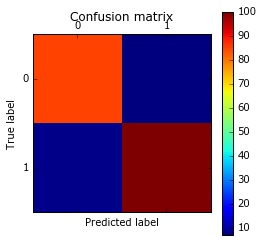

In [133]:
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print "Accuracy:", metrics.accuracy_score(testy, pred)

cm = confusion_matrix(testy, pred)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [134]:
#Confusion Matrix
print(cm)

[[ 85   7]
 [  8 100]]


In [135]:
#Ratios of Confusion Matrix
TP=float(cm[0,0])
FN=float(cm[0,1])
FP=float(cm[1,0])
TN=float(cm[1,1])
Accuracy = (TP + TN)/ (TP+FN+FP+TN)
Precision= TP/(TP+FP)
Recall = TP/(TP+FN)
F1=2*(Precision*Recall)/(Precision+Recall)

Accuracy, Precision, Recall,F1

(0.925, 0.9139784946236559, 0.9239130434782609, 0.918918918918919)